In [1]:
import pandas as pd

jobs_adzuna = pd.read_csv("../jobs_cleaned_sofia.csv")

jobs_adzuna

,date,job_title,salary_in_usd,work_mode,country,skills
0,2025,Team Lead (Finance),52996.0,onsite,GB,['r']
1,2025,Data Analyst,50000.0,hybrid,GB,"['excel', 'power bi', 'python', 'r', 'sql']"
2,2025,Junior Data Analyst,24000.0,onsite,GB,['r']
3,2025,Asset Data Analyst,35000.0,onsite,GB,['r']
4,2025,Healthcare Analyst (FTC),43779.0,onsite,GB,['r']
...,...,...,...,...,...,...
1245,2025,Quant Analytics Associate - Card Acquisitions ...,127390.0,onsite,US,['r']
1246,2025,Sr Analyst - Data,68026.0,onsite,US,['r']
1247,2025,Sr Analyst - Data,74026.0,onsite,US,['r']
1248,2025,Sr Analyst - Data,70282.0,onsite,US,['r']


In [2]:
jobs_adzuna[["salary_in_usd", "country"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   salary_in_usd  589 non-null    float64
 1   country        1250 non-null   object 
dtypes: float64(1), object(1)
memory usage: 19.7+ KB


In [40]:
jobs_adzuna.nunique

<bound method DataFrame.nunique of       date                                          job_title  salary_in_usd  \
0     2025                                Team Lead (Finance)        52996.0   
1     2025                                       Data Analyst        50000.0   
2     2025                                Junior Data Analyst        24000.0   
3     2025                                 Asset Data Analyst        35000.0   
4     2025                           Healthcare Analyst (FTC)        43779.0   
...    ...                                                ...            ...   
1245  2025  Quant Analytics Associate - Card Acquisitions ...       127390.0   
1246  2025                                  Sr Analyst - Data        68026.0   
1247  2025                                  Sr Analyst - Data        74026.0   
1248  2025                                  Sr Analyst - Data        70282.0   
1249  2025                                  Sr Analyst - Data        73620.0   

    

In [41]:
jobs_adzuna["job_title"].unique()

array(['Team Lead (Finance)', 'Data Analyst', 'Junior Data Analyst',
       'Asset Data Analyst', 'Healthcare Analyst (FTC)', 'DATA ANALYST',
       'Data Protection Analyst',
       'Remote Travel Business Development / Sales Coach - World 1 Franchise',
       'Market Data Admin and Compliance Support Analyst',
       'Commercial / Ecommerce Analyst', 'Senior Data Analyst',
       'Data Engineer', 'Data Scientist',
       'People Data and Performance Metrics Analyst', 'Senior MI Analyst',
       'Data Analysis Needed For Insights into a Time Management Survey',
       'Data Product Manager, Product Analytics, Global Streaming',
       'Data and Reporting Analyst', 'Data Governance Analyst',
       'Power BI Process & Data Lead (m/w/d)', 'Clinical Data Analyst',
       'Engineer - London Stock Exchange Group', 'Data Business Analyst',
       'Data Analyst Graduate with an interest in cars',
       'HR Insights Analyst - Oracle HCM',
       'STaR Specialist Engagement Worker',
       'A

In [54]:
# analyse the difference of salary per country

salary_by_country = jobs_adzuna.groupby("country")["salary_in_usd"].mean().sort_values(ascending=False).round(2)
salary_by_country

country
US    99537.37
DE    83803.75
NL    70353.33
FR    55329.63
GB    48676.58
Name: salary_in_usd, dtype: float64

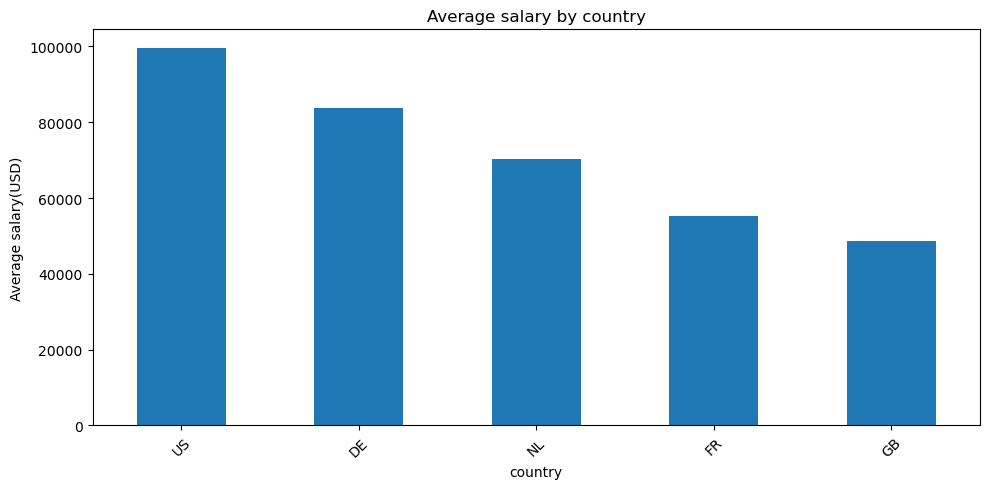

In [4]:
import numpy as np

import matplotlib.pyplot as plt

salary_by_country.plot(kind="bar", figsize=(10, 5), title="Average salary by country")
plt.ylabel("Average salary(USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# analyse the differences of salary by work mode

salary_by_work_mode = (
    jobs_adzuna
    .groupby("work_mode")["salary_in_usd"]
    .agg(["count", "mean"])
    .sort_values(by="mean", ascending=False)
    .round(2)
)

print(salary_by_work_mode)

           count      mean
work_mode                 
remote        43  87305.26
hybrid        58  74039.05
onsite       488  70640.83


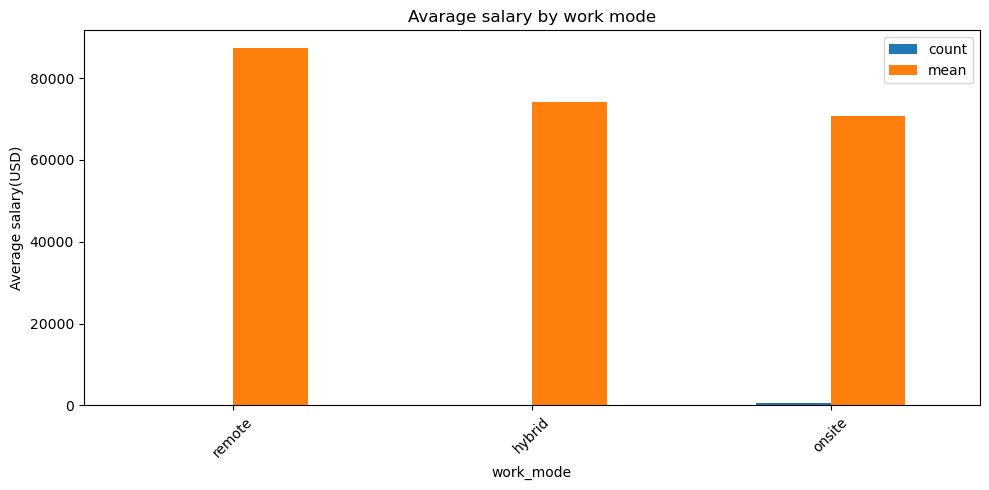

In [9]:
salary_by_work_mode.plot(kind="bar", figsize=(10, 5), title="Avarage salary by work mode")
plt.ylabel("Average salary(USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
jobs_per_skill = (
    jobs_adzuna
    .groupby("skills")["salary_in_usd"]
    .agg(["mean"])
    .sort_values(by="mean")
)

print(jobs_per_skill)

                                                             mean
skills                                                           
['excel', 'r', 'statistics']                         29472.000000
['power bi', 'python', 'r']                          40000.000000
['excel', 'power bi', 'python', 'r', 'sql']          46250.000000
['power bi', 'r', 'tableau']                         46666.666667
['excel', 'r', 'sql']                                48776.000000
['excel', 'power bi', 'python', 'r', 'spark', '...   55000.000000
['r', 'tableau']                                     57344.416667
['power bi', 'r', 'sql']                             63463.500000
['python', 'r', 'sql']                               64693.200000
['r']                                                70918.694093
['excel', 'r', 'tableau']                            73992.000000
['power bi', 'python', 'r', 'sql', 'tableau']        75000.000000
['r', 'sql']                                         78973.097561
['power bi

In [ ]:
# most asked skill

from collections import Counter
import ast

jobs_adzuna["skills"] = jobs_adzuna["skills"].dropna().apply(ast.literal_eval) # transform skills into a list

all_skills = jobs_adzuna["skills"].dropna().sum()

count_skills = Counter(all_skills)

skills_df = pd.DataFrame(count_skills.items(), columns=["skill", "count"])
skills_df = skills_df.sort_values(by="count", ascending=False)

print(skills_df.head(10))

               skill  count
0                  r   1250
4                sql     68
1              excel     54
2           power bi     32
7            tableau     32
3             python     18
5              azure     17
8   machine learning     13
9                aws      9
10             spark      9


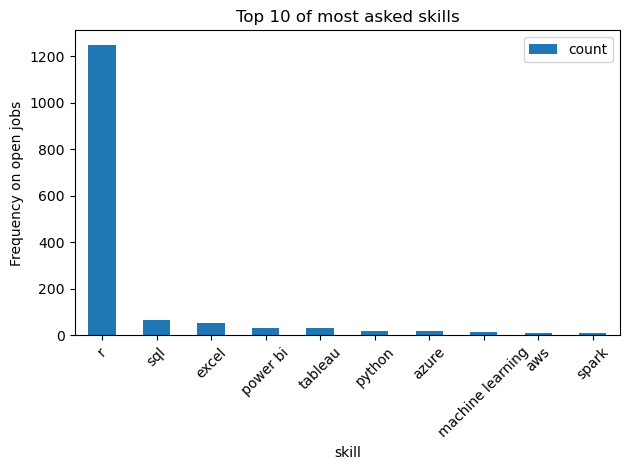

In [18]:
skills_df.head(10).plot(kind="bar", x="skill", y="count", title="Top 10 of most asked skills")
plt.ylabel("Frequency on open jobs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#skills in high paid jobs

median_salary = jobs_adzuna["salary_in_usd"].median()

high_paid_jobs = jobs_adzuna[jobs_adzuna["salary_in_usd"] > median_salary]

skills_high_paid = high_paid_jobs["skills"].dropna().sum()
count_high_skills = Counter(skills_high_paid)

high_paid_jobs_df = pd.DataFrame(count_high_skills.items(), columns=["skill", "count"]).sort_values(by="count", ascending=False)

high_paid_jobs_df

,skill,count
0,r,294
7,sql,43
4,excel,14
2,tableau,9
1,python,4
3,machine learning,4
5,power bi,4
6,azure,3
8,aws,3


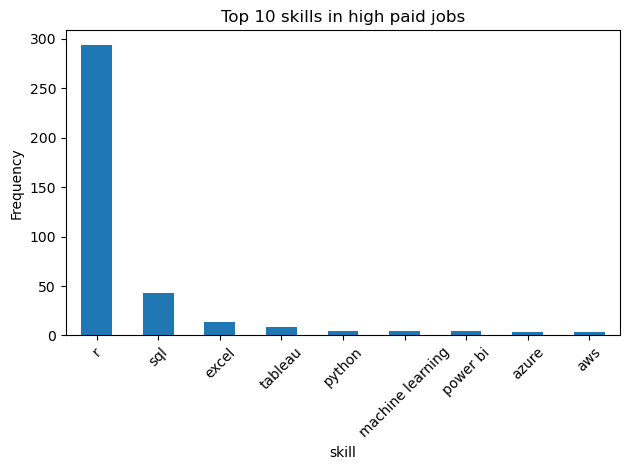

In [23]:
high_paid_jobs_df.head(10).plot(kind="bar", x="skill", y="count", title="Top 10 skills in high paid jobs", legend=False)
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
df_skills_salary = jobs_adzuna[["skills", "salary_in_usd"]].dropna()

df_exploded = df_skills_salary.explode("skills")

In [25]:
salary_by_skill = (
    df_exploded.groupby("skills")["salary_in_usd"]
    .agg(["count", "mean"])
    .sort_values(by="mean", ascending=False)
)

In [26]:
salary_by_skill.query("count >= 5").head(10)

,count,mean
skills,,
aws,5,104765.600000
excel,32,81817.375000
sql,54,74832.129630
r,589,72192.045840
python,13,71901.230769
tableau,19,62210.210526
power bi,13,56015.153846


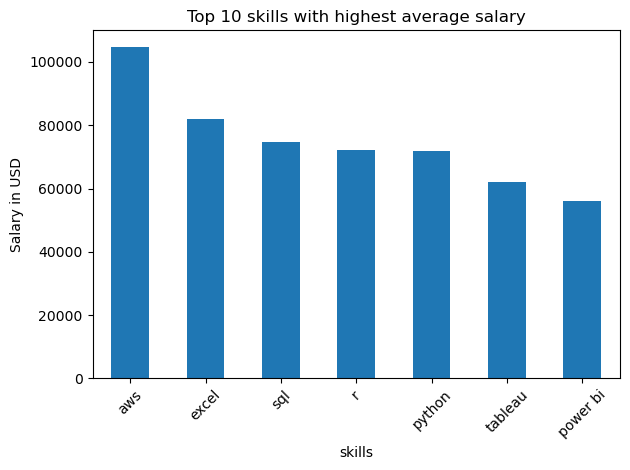

In [27]:
salary_by_skill.query("count >= 5").head(10).plot(
    kind="bar", y="mean", title="Top 10 skills with highest average salary", legend=False
)
plt.ylabel("Salary in USD")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
df_exploded = jobs_adzuna[["work_mode", "skills"]].dropna(subset=["work_mode", "skills"])
df_exploded = df_exploded.explode("skills")

skills_per_work_mode = (
    df_exploded.groupby(["work_mode", "skills"])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
)

In [33]:
top_skills_remote = skills_per_work_mode[skills_per_work_mode["work_mode"] == "remote"].head(10)
print(top_skills_remote)

   work_mode  skills  count
20    remote       r     52
18    remote   excel      4
19    remote  python      1
21    remote     sql      1


In [34]:
top_skills_hybrid = skills_per_work_mode[skills_per_work_mode["work_mode"] == "hybrid"].head(10)
print(top_skills_hybrid)

  work_mode      skills  count
4    hybrid           r     67
2    hybrid    power bi      6
5    hybrid         sql      4
1    hybrid       excel      4
3    hybrid      python      3
0    hybrid         aws      1
6    hybrid  statistics      1


In [35]:
top_skills_on_site = skills_per_work_mode[skills_per_work_mode["work_mode"] == "on_site"].head(10)
print(top_skills_on_site)

Empty DataFrame
Columns: [work_mode, skills, count]
Index: []


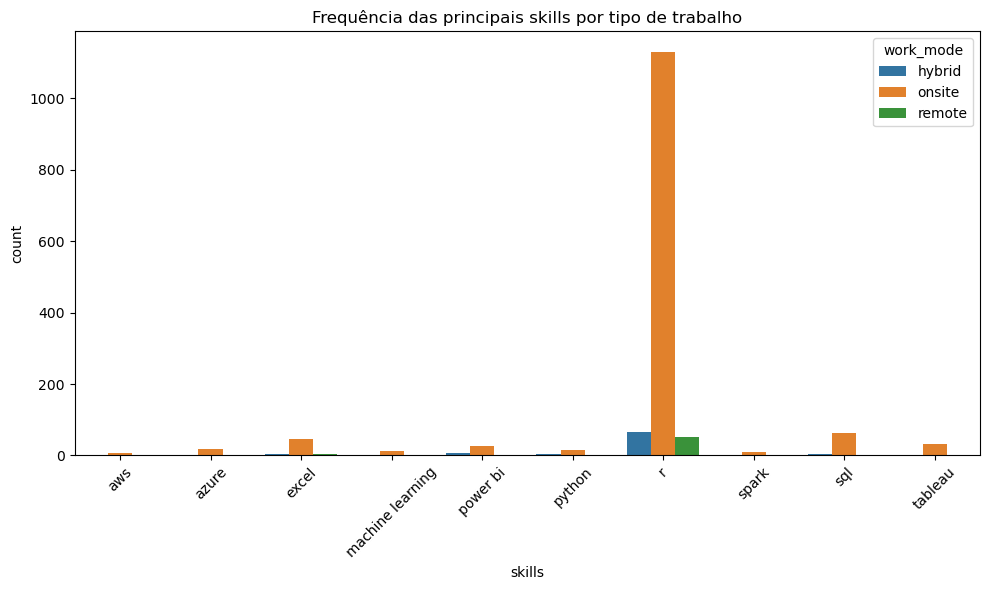

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Podes limitar às top 10 skills mais comuns em geral
top_skills = df_exploded["skills"].value_counts().head(10).index

# Filtrar só essas para comparação
filtered = df_exploded[df_exploded["skills"].isin(top_skills)]

# Recontar para gráfico
count_ = (
    filtered.groupby(["skills", "work_mode"])
    .size()
    .reset_index(name="count")
)

# Gráfico de barras agrupado
plt.figure(figsize=(10, 6))
sns.barplot(data=count_, x="skills", y="count", hue="work_mode")
plt.title("Frequência das principais skills por tipo de trabalho")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [45]:
from itertools import combinations

In [46]:
skills_list = jobs_adzuna["skills"].dropna()
skills_list = skills_list[skills_list.apply(lambda x:len(x) >= 2)]

In [47]:
pairs = []
for skill_set in skills_list:
    pairs += list(combinations(sorted(set(skill_set)), 2))

In [49]:
count_pairs = Counter(pairs)
pairs_df = pd.DataFrame(count_pairs.items(), columns=["pair", "count"])

In [50]:
pairs_df = pairs_df.sort_values(by="count", ascending=False)

print(pairs_df.head(10))

                     pair  count
9                (r, sql)     68
2              (excel, r)     54
5           (power bi, r)     32
13           (r, tableau)     32
7             (python, r)     18
10             (azure, r)     17
8           (python, sql)     14
14  (machine learning, r)     13
6         (power bi, sql)     12
15               (aws, r)      9


In [52]:
# Obter todas as skills únicas dos pares
skills_unicas = sorted(set([s for pair in count_pairs.keys() for s in pair]))

# Criar matriz de zeros com índice e colunas iguais (skills únicas)
cooc_matrix = pd.DataFrame(0, index=skills_unicas, columns=skills_unicas)

# Preencher a matriz com contagens de coocorrência
for (a, b), count in count_pairs.items():
    cooc_matrix.at[a, b] = count
    cooc_matrix.at[b, a] = count  # simetria



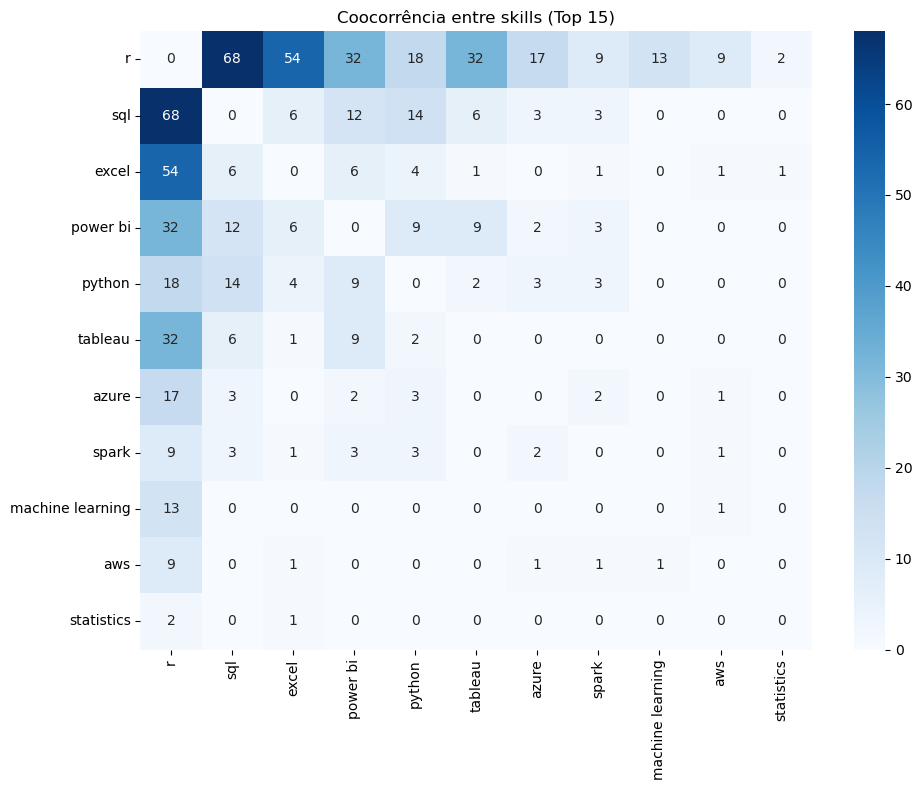

In [53]:
# Filtrar para top 15 skills mais conectadas
top_skills = cooc_matrix.sum().sort_values(ascending=False).head(15).index
filtered_matrix = cooc_matrix.loc[top_skills, top_skills]

# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(filtered_matrix, annot=True, fmt=".0f", cmap="Blues")
plt.title("Coocorrência entre skills (Top 15)")
plt.tight_layout()
plt.show()
